In [49]:
%load_ext autoreload
%autoreload

#import cv2
import matplotlib.pyplot as plt
import imageio
import numpy as np
from huggingface_hub import from_pretrained_keras

import sys
sys.path.append("..")
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\phili\AppData\Local\Temp\ipykernel_9540\3209637358.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


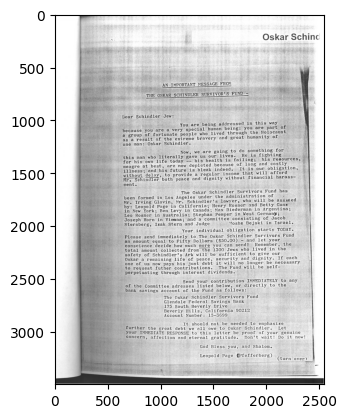

In [41]:
img_path = '../test_data/20041908-schindler.jpg'
img = imageio.imread(img_path)
plt.imshow(img)

In [3]:
### Binarize image
model_name = "SBB/eynollah-binarization"
model = from_pretrained_keras(model_name)
binarized = do_prediction(model, img)

# convert from mask to image (letters black)
binarized = binarized.astype(np.int8)
binarized = -binarized + 1
binarized = binarized.astype(np.uint8)

plt.imshow(binarized*255)

Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 5901.93it/s]


c:\Users\phili\anaconda3\envs\ocrd\lib\site-packages\keras\src\layers\core\lambda_layer.py:327: UserWarning: keras.layers.core is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


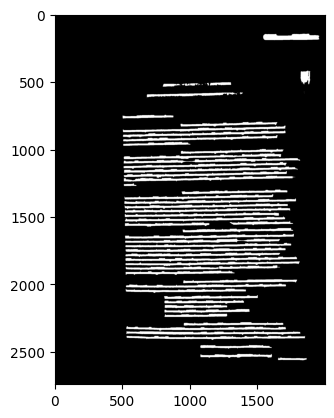

In [17]:
### Segment textlines
# do inference
model_name = "SBB/eynollah-textline"
#model = from_pretrained_keras(model_name)
textlines = do_prediction(model, binarized*255)

plt.imshow(textlines*255)

In [21]:
#imageio.imwrite('../test_data/schindler_binarized_textlines.png', textlines*255)

### Post-processing

In [68]:
img_resized = resize_image(img, textlines.shape[0], textlines.shape[1])

In [265]:
textline_images = extract_and_deskew_textlines(img_resized, textlines[...,0])

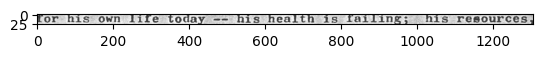

In [266]:
plt.imshow(textline_images[10][0])

In [267]:
for i in range(50):
    print(textline_images[i][1:])

((1749.39892578125, 169.15623474121094), 45, 414, 89.4662094116211)
((1853.98193359375, 468.663818359375), 70, 103, 0.8951737284660339)
((1004.8651733398438, 597.20166015625), 21, 652, 88.54187774658203)
((1287.7076416015625, 816.4378662109375), 26, 717, 88.59031677246094)
((1105.155517578125, 854.6455078125), 27, 1204, 88.65999603271484)
((1104.910888671875, 888.0396728515625), 27, 1204, 88.71495056152344)
((1076.5572509765625, 922.7373046875), 26, 1143, 88.801513671875)
((753.3775634765625, 960.7329711914062), 21, 497, 88.96308898925781)
((1312.05419921875, 1018.2553100585938), 27, 760, 88.62627410888672)
((1091.57861328125, 1056.1019287109375), 27, 1165, 88.90593719482422)
((1161.3536376953125, 1086.34033203125), 26, 1307, 88.90460968017578)
((1111.4971923828125, 1121.349609375), 26, 1207, 88.85903930664062)
((1152.8642578125, 1154.1588134765625), 26, 1284, 88.8678207397461)
((1112.6943359375, 1189.907958984375), 30, 1207, 88.87670135498047)
((1141.948486328125, 1219.8072509765625),

In [33]:
cropped_img = img[1000:1224,1000:1448]
cropped_img = np.expand_dims(cropped_img, 0)

In [29]:
cropped_img = img[:448,:672]
cropped_img = np.expand_dims(cropped_img, 0)

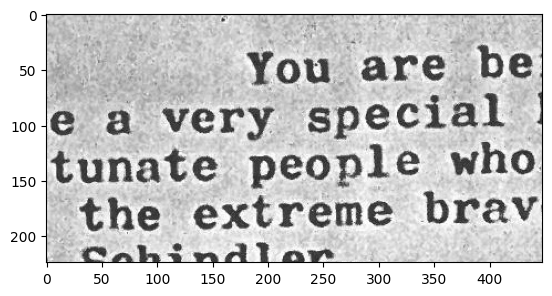

In [34]:
plt.imshow(cropped_img[0])

In [35]:
pred = model.predict(cropped_img/255)

1/1 [==============================] - 0s 353ms/step


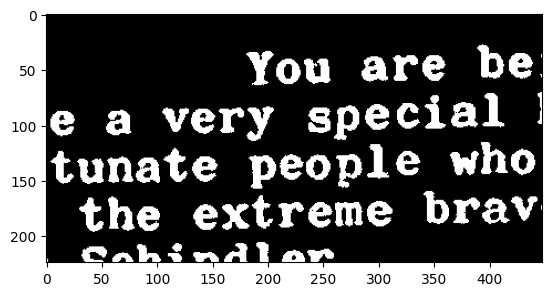

In [37]:
seg = np.argmax(pred, axis=3)[0]
seg_color = np.repeat(seg[:, :, np.newaxis], 3, axis=2)
plt.imshow(seg_color*255)

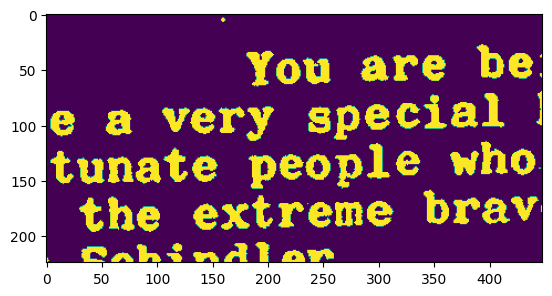

In [36]:
plt.imshow(pred[0,...,1]>.1)

In [41]:
pred = do_line_segmentation(model_name, img)

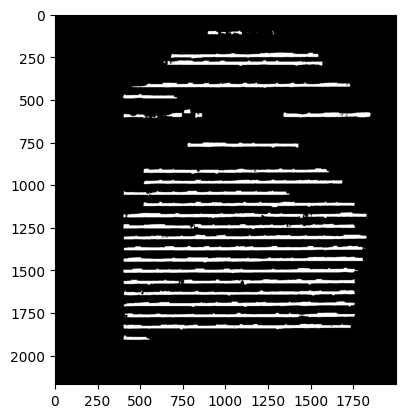

In [36]:
plt.imshow(pred*255)

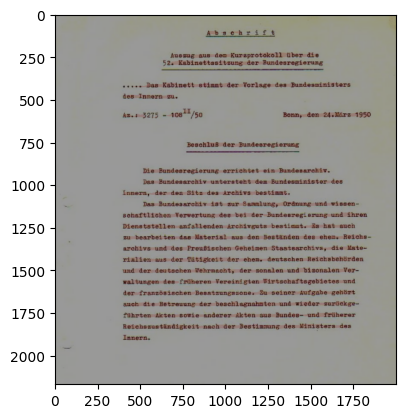

In [38]:
plt.imshow(visualize_model_output(pred, img, model_name))